# Mini-Project 2: Data Preprocessing For Wine Quality Analysis

Using the Wine Quality dataset, explore the following questions:
1. How do different chemical properties correlate with the quality of wine?
- Answer: no correlation between the quality of wine and different chemical properties


In [1]:
# df1_clean.corr()

2. Is there a significant difference in quality between red and white wines?
- Answer: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
def download_and_read_csv(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.csv'):
            print(f"Found CSV file: {file}")
            df = pd.read_csv(file)
            return df

In [4]:
dataset1_link = "uciml/red-wine-quality-cortez-et-al-2009"
dataset2_link = "ruthgn/wine-quality-data-set-red-white-wine"
df_wine1 = download_and_read_csv(dataset1_link)
df_wine2 = download_and_read_csv(dataset2_link)

Found CSV file: winequality-red.csv
Found CSV file: wine-quality-white-and-red.csv


In [5]:
# creating copys to work with them
df1 = df_wine1.copy()
df2 = df_wine2.copy()

In [6]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
print(df1.isnull().sum()) # df1 doesn't have the missings

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
print(df1.duplicated().sum()) # df1 has a duplicated rows
print(df1.shape)
df1 = df1.drop_duplicates()
print(df1.shape)

240
(1599, 12)
(1359, 12)


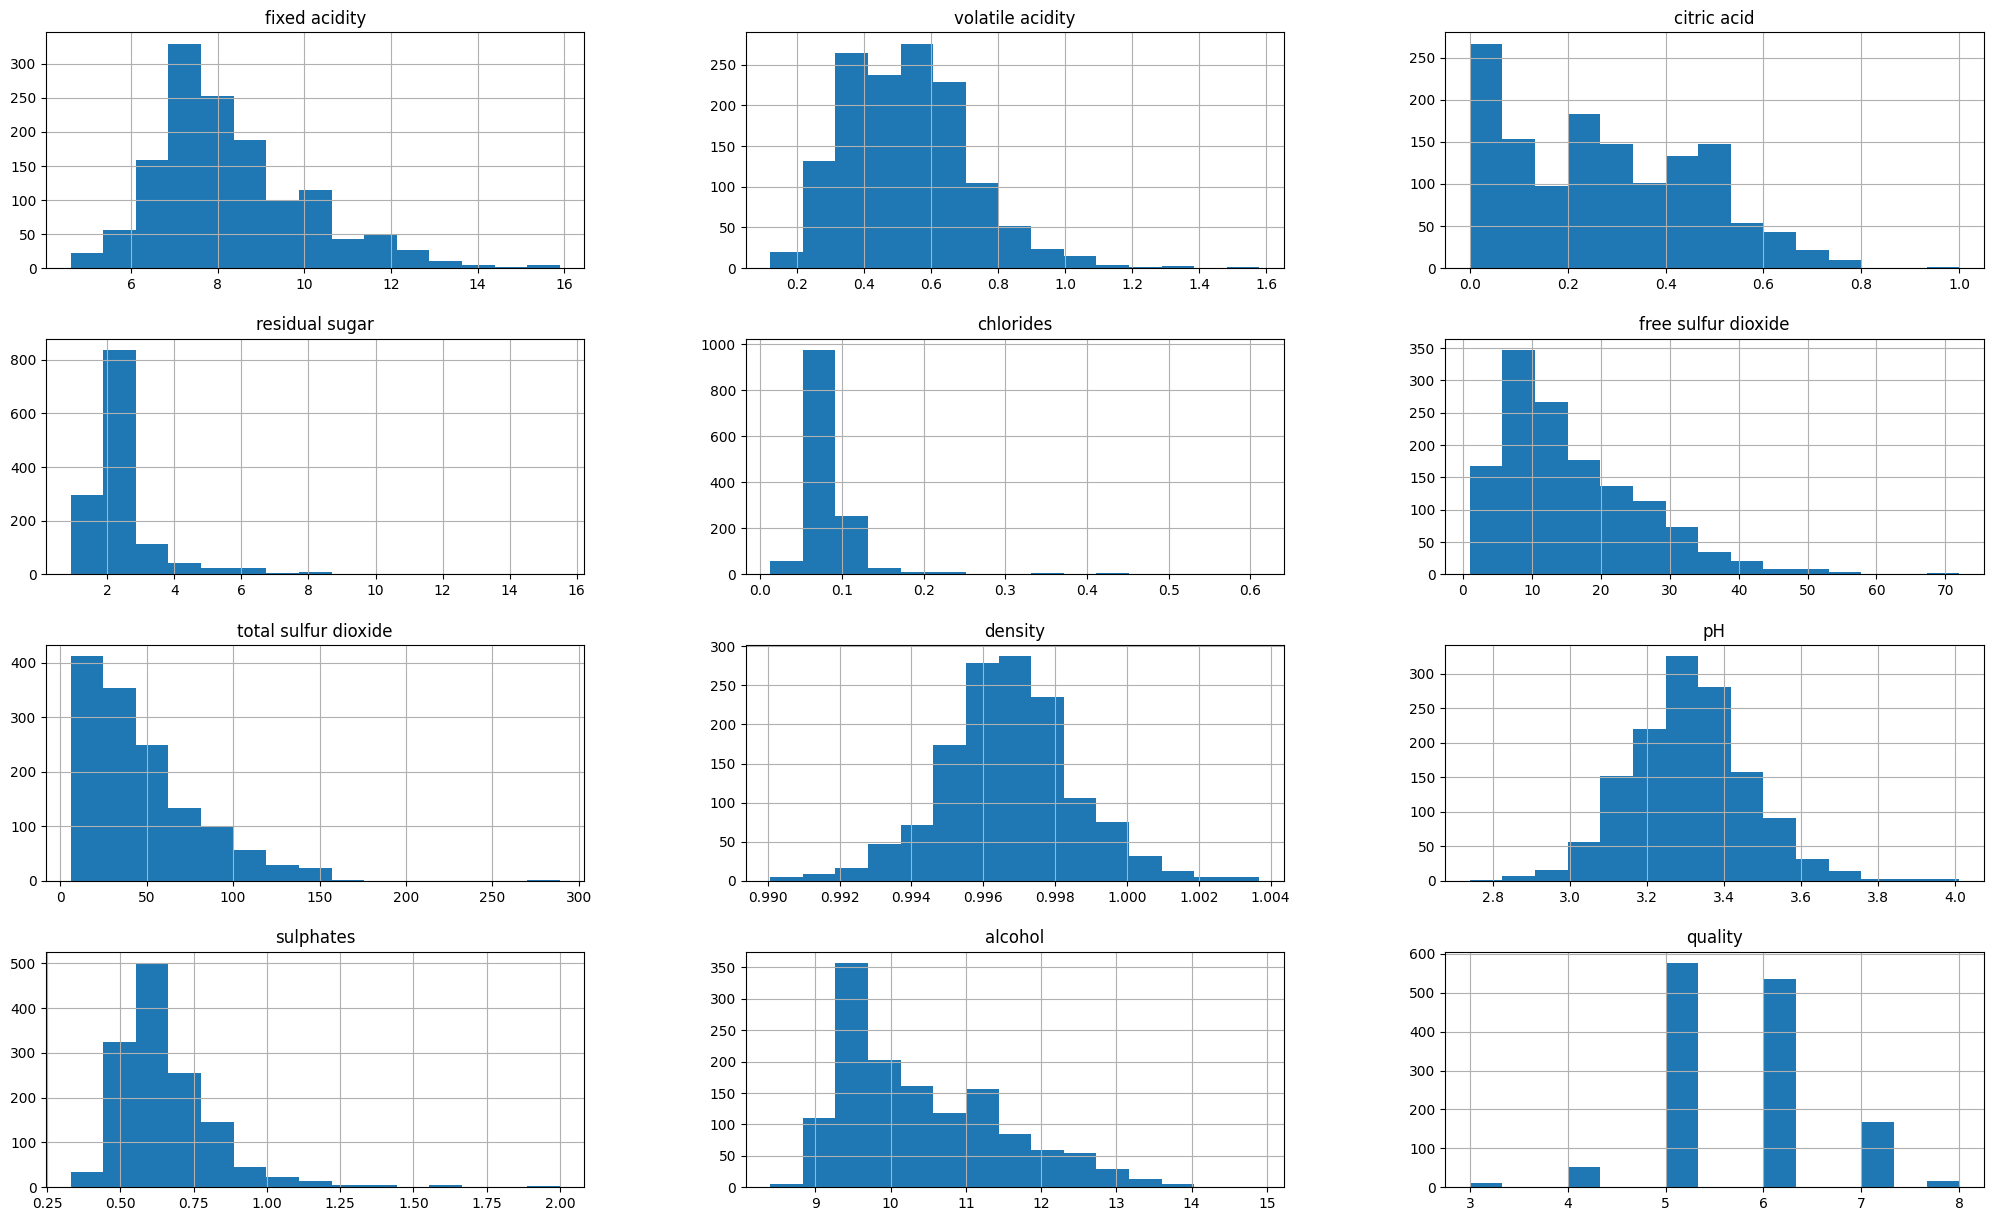

In [10]:
df1.hist(figsize=(25,15), bins=15)
plt.show()

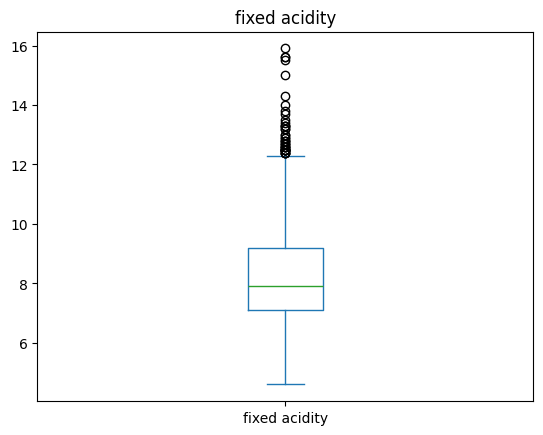

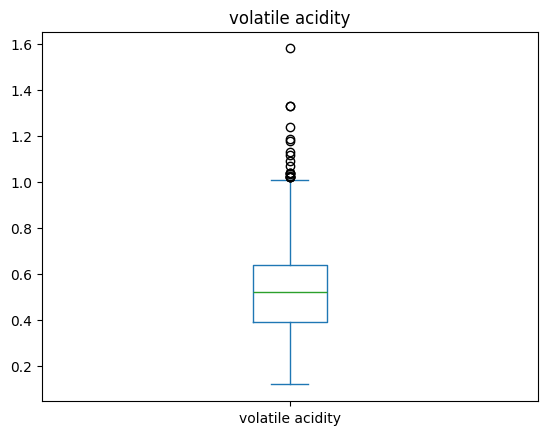

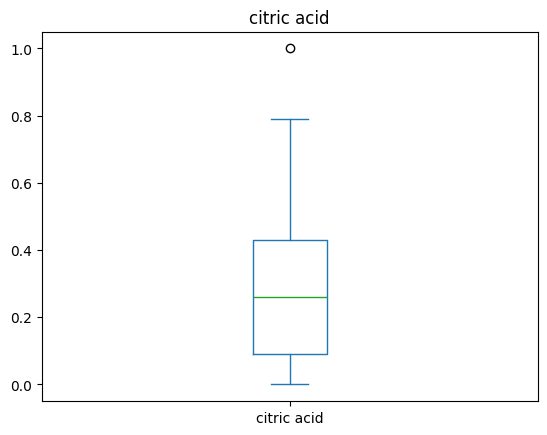

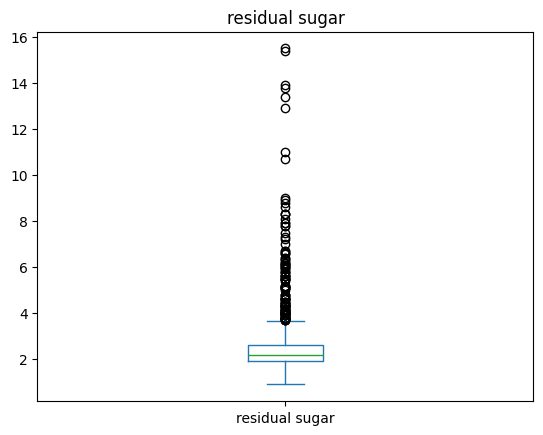

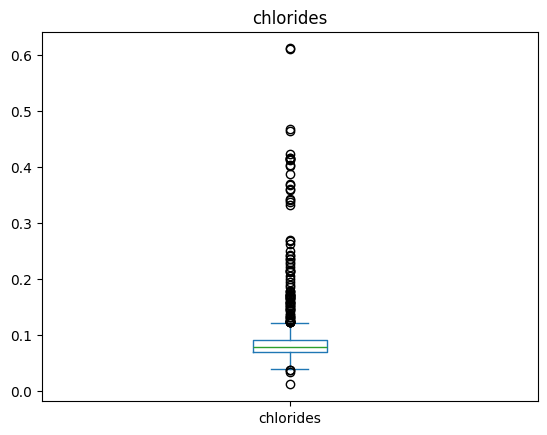

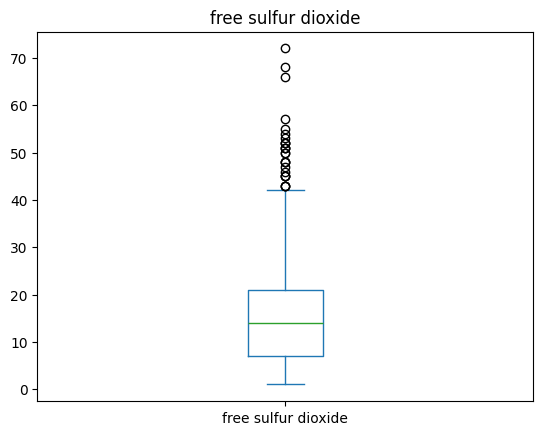

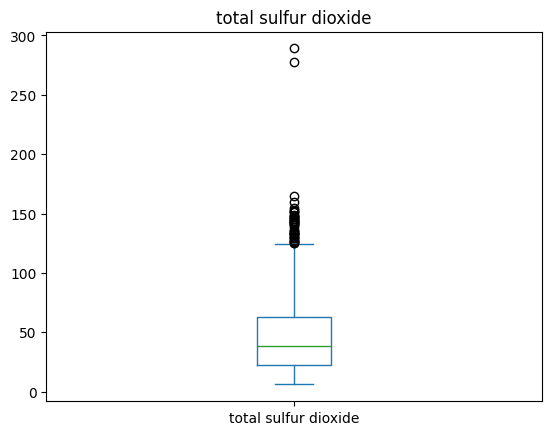

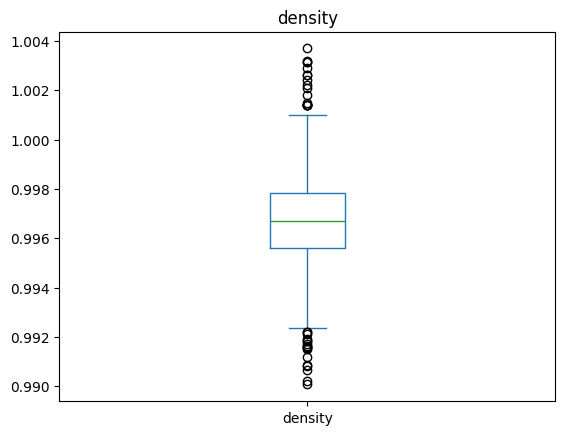

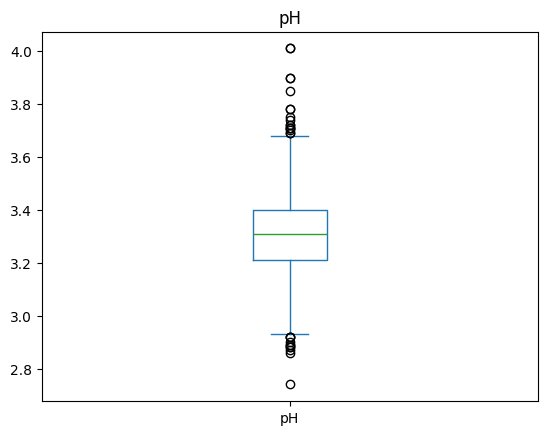

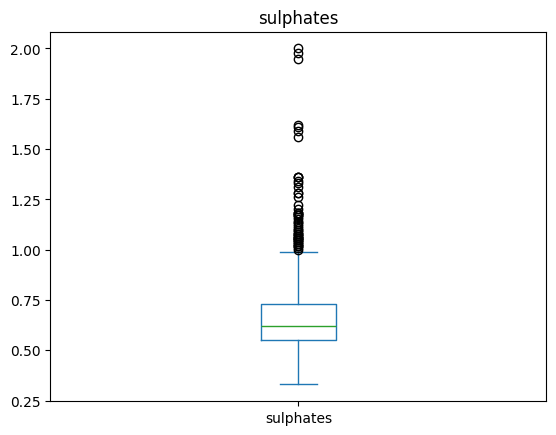

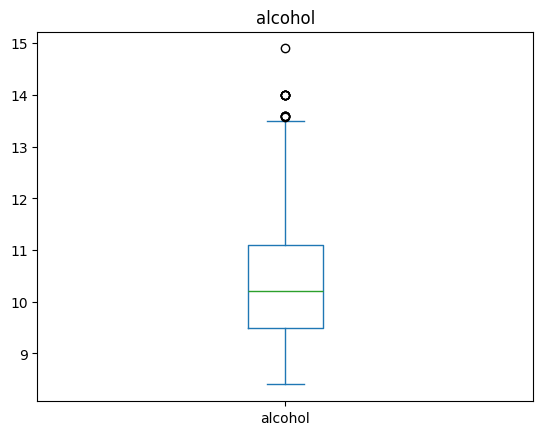

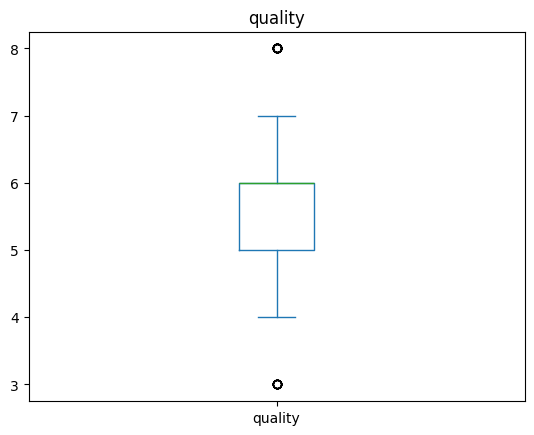

In [11]:
df1_columns = df1.columns.to_list()

for column in df1_columns:
    df1[column].plot(kind='box')
    plt.title(f"{column}")
    plt.show()

In [12]:
# almost all variables (columns) in df1 have outliers
# creating class OutlierHandler to clean the data
class OutlierHandler:
    def __init__(self, df):
        self.df = df
    
    def check_outliers(self, col_name):
        Q1 = self.df[col_name].quantile(0.25)
        Q3 = self.df[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    def remove_outliers(self, col_names):
        for col_name in col_names:
            lower_bound, upper_bound = self.check_outliers(col_name)
            self.df = self.df[(self.df[col_name] >= lower_bound) & (self.df[col_name] <= upper_bound)]
        return self.df

In [13]:
outlier_handler = OutlierHandler(df1)
column_to_clean = df1_columns
df1_clean = outlier_handler.remove_outliers(column_to_clean)
print(df1_clean.shape)

(974, 12)


In [14]:
df1_clean.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.28,0.65,0.23,0.18,-0.15,-0.10,0.60,-0.70,0.17,-0.02,0.13
volatile acidity,-0.28,1.00,-0.62,0.02,0.13,-0.01,0.10,0.05,0.24,-0.32,-0.23,-0.35
citric acid,0.65,-0.62,1.00,0.14,0.05,-0.08,-0.00,0.28,-0.48,0.28,0.16,0.23
residual sugar,0.23,0.02,0.14,1.00,0.24,0.08,0.16,0.38,-0.06,0.04,0.10,0.03
chlorides,0.18,0.13,0.05,0.24,1.00,0.03,0.18,0.41,-0.17,-0.10,-0.30,-0.18
free sulfur dioxide,-0.15,-0.01,-0.08,0.08,0.03,1.00,0.63,-0.01,0.13,0.11,-0.04,-0.01
total sulfur dioxide,-0.10,0.10,-0.00,0.16,0.18,0.63,1.00,0.15,0.01,-0.05,-0.25,-0.18
density,0.60,0.05,0.28,0.38,0.41,-0.01,0.15,1.00,-0.24,0.06,-0.55,-0.21
pH,-0.70,0.24,-0.48,-0.06,-0.17,0.13,0.01,-0.24,1.00,0.00,0.11,-0.07
sulphates,0.17,-0.32,0.28,0.04,-0.10,0.11,-0.05,0.06,0.00,1.00,0.28,0.44
